#### !!IMPORTANTE INSTALAR¡¡¡

- pip install googletrans==4.0.0-rc1
- pip install geodatasets
- python -m pip install geopandas
- python -m pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
vid = "../data/KRvideos_cc50_202101.csv"
df = pd.read_csv(vid)

# Visualizar las primeras filas
print(df.head())

      video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0      17.14.11            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U      17.14.11  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80      17.14.11  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI      17.14.11     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id     publish_time  \
0         22.0  13/11/2017 2:07   
1         25.0  13/11/2017 5:59   
2         22.0  11/11/2017 2:16   
3         25.0  12/11/2017 6:19   
4         25.0  13/11/2017 6:08   

                                                tags     views   likes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130.0  1422.0   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533.0   211.0   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409.0  5112.0   
3  이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"

In [5]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36897 entries, 0 to 36896
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                36741 non-null  object 
 1   trending_date           34730 non-null  object 
 2   title                   34592 non-null  object 
 3   channel_title           34575 non-null  object 
 4   category_id             34567 non-null  float64
 5   publish_time            34567 non-null  object 
 6   tags                    34568 non-null  object 
 7   views                   34567 non-null  float64
 8   likes                   34567 non-null  float64
 9   dislikes                34567 non-null  float64
 10  comment_count           34567 non-null  float64
 11  thumbnail_link          34568 non-null  object 
 12  comments_disabled       34567 non-null  object 
 13  ratings_disabled        34567 non-null  object 
 14  video_error_or_removed  34567 non-null

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04,36897.000000,36897.000000
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03,35.988036,127.767228
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04,1.136405,0.938696
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00,33.510137,126.521931
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02,35.170966,126.910434
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02,35.866789,127.689715
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02,37.348068,128.606971
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06,37.566349,129.316954


## CANTIDAD DE DATOS

In [31]:
len(df)

36897

## VERIFICAR VALORES NULOS POR COLUMNA

In [32]:
# Verificar valores nulos por columna
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

# Porcentaje de valores nulos
missing_val = df.isnull().mean() * 100
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)

missing_val

description               5493
comment_count             2330
category_id               2330
publish_time              2330
views                     2330
likes                     2330
dislikes                  2330
comments_disabled         2330
ratings_disabled          2330
video_error_or_removed    2330
tags                      2329
thumbnail_link            2329
channel_title             2322
title                     2305
trending_date             2167
video_id                   156
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64


description               14.887389
category_id                6.314877
publish_time               6.314877
views                      6.314877
likes                      6.314877
dislikes                   6.314877
comment_count              6.314877
comments_disabled          6.314877
ratings_disabled           6.314877
video_error_or_removed     6.314877
tags                       6.312166
thumbnail_link             6.312166
channel_title              6.293195
title                      6.247120
trending_date              5.873106
video_id                   0.422799
dtype: float64

<Axes: >

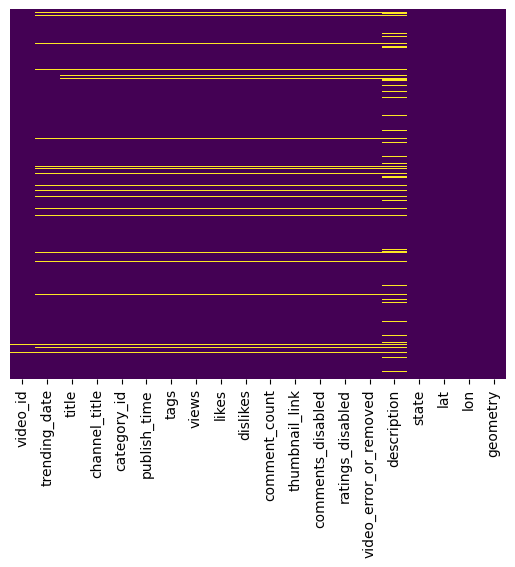

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## TRATAMIENTO DE VALORES DUPLICADOS

In [33]:
# Verificar si hay duplicados
duplicates = df.duplicated().sum()
print(f'Duplicados: {duplicates}')

# Eliminar duplicados si es necesario
#df = df.drop_duplicates()

Duplicados: 1291


## TRATAMIENTO DE VALORES NULOS

In [34]:
# Para imputar con la mediana
df['views'] = df['views'].fillna(df['views'].median())
df['likes'] = df['likes'].fillna(df['likes'].median())
df['dislikes'] = df['dislikes'].fillna(df['dislikes'].median())
df['comment_count'] = df['comment_count'].fillna(df['comment_count'].median())

# Para imputar con la moda
df['video_id'] = df['video_id'].fillna(df['video_id'].mode()[0])
df['trending_date'] = df['trending_date'].fillna(df['trending_date'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['channel_title'] = df['channel_title'].fillna(df['channel_title'].mode()[0])
df['category_id'] = df['category_id'].fillna(df['category_id'].mode()[0])
df['publish_time'] = df['publish_time'].fillna(df['publish_time'].mode()[0])
df['tags'] = df['tags'].fillna(df['tags'].mode()[0])
df['thumbnail_link'] = df['thumbnail_link'].fillna(df['thumbnail_link'].mode()[0])
df['comments_disabled'] = df['comments_disabled'].fillna(df['comments_disabled'].mode()[0])
df['ratings_disabled'] = df['ratings_disabled'].fillna(df['ratings_disabled'].mode()[0])
df['video_error_or_removed'] = df['video_error_or_removed'].fillna(df['video_error_or_removed'].mode()[0])
df['description'] = df['description'].fillna(df['description'].mode()[0])

# Eliminar la columna 'Cabin' por tener demasiados valores nulos
#df.drop('Cabin', axis=1, inplace=True)

# Verificar nuevamente los valores nulos
dflimp = df.isnull().sum()
print(dflimp)

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64


In [35]:
len(df)

36897

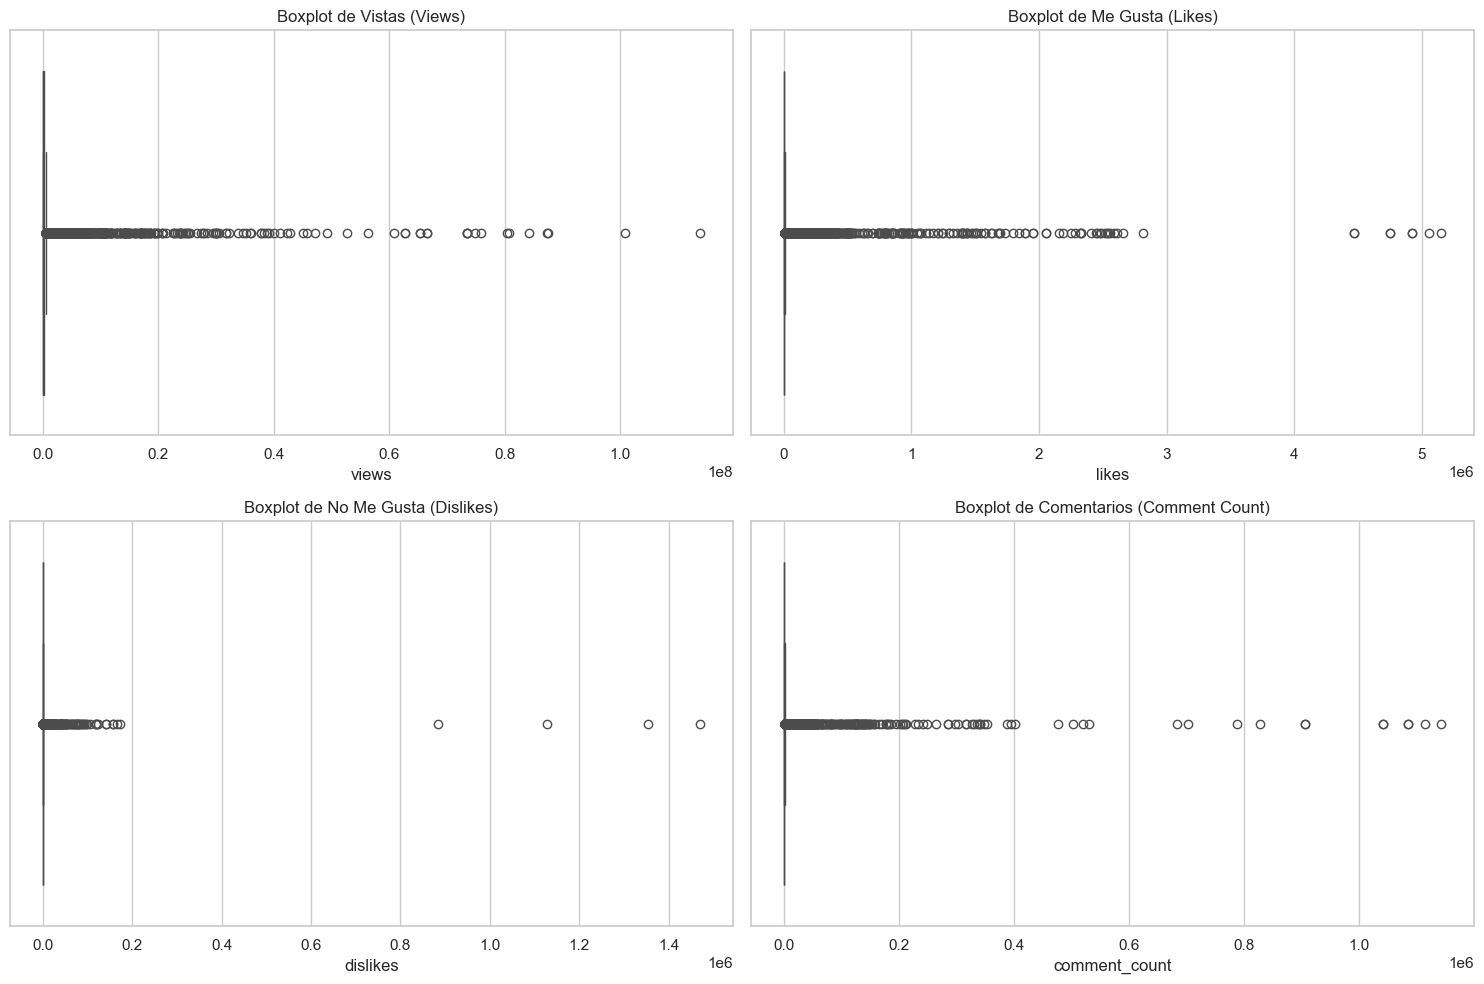

In [36]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear boxplots para identificar valores atípicos
plt.figure(figsize=(15, 10))

# Boxplot para 'views'
plt.subplot(2, 2, 1)
sns.boxplot(x=df['views'])
plt.title('Boxplot de Vistas (Views)')

# Boxplot para 'likes'
plt.subplot(2, 2, 2)
sns.boxplot(x=df['likes'])
plt.title('Boxplot de Me Gusta (Likes)')

# Boxplot para 'dislikes'
plt.subplot(2, 2, 3)
sns.boxplot(x=df['dislikes'])
plt.title('Boxplot de No Me Gusta (Dislikes)')

# Boxplot para 'comment_count'
plt.subplot(2, 2, 4)
sns.boxplot(x=df['comment_count'])
plt.title('Boxplot de Comentarios (Comment Count)')

plt.tight_layout()
plt.show()

## VERIFICANDO VALORES ATIPICOS

In [37]:
class OutlierHandler:
    def __init__(self, df):
        self.df = df

    def _calculate_iqr_bounds(self, column):
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    def find_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        return outliers

    def count_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        outliers_count = outliers.shape[0]
        total_count = self.df.shape[0]
        percentage_outliers = (outliers_count / total_count) * 100
        return outliers_count, percentage_outliers

    def replace_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        median = self.df[column].median()
        # Aplicar reemplazo de valores atípicos por la mediana
        self.df[column] = self.df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
        return self.df


In [38]:
outlier_handler = OutlierHandler(df)

In [39]:
# Aplicar el método a las columnas relevantes para encontrar valores atípicos
outliers_views = outlier_handler.find_outliers_iqr('views')
outliers_likes = outlier_handler.find_outliers_iqr('likes')
outliers_dislikes = outlier_handler.find_outliers_iqr('dislikes')
outliers_comment_count = outlier_handler.find_outliers_iqr('comment_count')

# Imprimir resultados
print("Outliers in 'views':")
print(outliers_views)

print("\nOutliers in 'likes':")
print(outliers_likes)

print("\nOutliers in 'dislikes':")
print(outliers_dislikes)

print("\nOutliers in 'comment_count':")
print(outliers_comment_count)

Outliers in 'views':
          video_id trending_date  \
11     9dQ02l7YlQI      17.14.11   
14     o4_tHTmniw4      17.14.11   
59     zOOmEDwPJX0      17.14.11   
65     7MxiQ4v0EnE      17.14.11   
66     QLOT92uIITo      17.14.11   
...            ...           ...   
36823  sJL2bcZ9L30      18.14.06   
36849       #NAME?      18.14.06   
36856  2L7bZ2Mkz28      18.14.06   
36879  LbSU1_SG91w      18.14.06   
36888  uHHe9aGGppU      18.14.06   

                                                   title  \
11     우리가 원했던 경기력 !!! 손흥민 멀티골, 기성용 탈압박 ● 대한민국 vs 콜롬비...   
14         WannaOne (워너원) - 'Beautiful' M/V (Movie ver.)   
59     Jannat (Full Song) Aatish - Latest Punjabi Son...   
65     Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
66     Saada Time | Dhira Gill | Maha Film | Full Vid...   
...                                                  ...   
36823                     백종원이 '뚝섬 골목 식당'에서 분노 폭발한 이후 상황   
36849                      Dumbo Official Teaser Trailer   
36856 

## CANTIDAD DE ATIPICOS

In [40]:
# Aplicar el método a las columnas relevantes y sumar los resultados
columns = ['views', 'likes', 'dislikes', 'comment_count']
total_outliers = 0
total_percentage = 0

for column in columns:
    outliers_count, percentage_outliers = outlier_handler.count_outliers_iqr(column)  # Uso del método de la clase
    total_outliers += outliers_count
    total_percentage += percentage_outliers
    print(f"Columna: {column} - Valores atípicos: {outliers_count} ({percentage_outliers:.2f}%)")

# Mostrar los resultados totales
print(f"\nValores atípicos totales: {total_outliers}")
print(f"Porcentaje total de valores atípicos: {total_percentage / len(columns):.2f}%")

Columna: views - Valores atípicos: 4190 (11.36%)
Columna: likes - Valores atípicos: 3892 (10.55%)
Columna: dislikes - Valores atípicos: 4357 (11.81%)
Columna: comment_count - Valores atípicos: 4015 (10.88%)

Valores atípicos totales: 16454
Porcentaje total de valores atípicos: 11.15%


## TRATAMIENTO DE VALORES ATIPICOS

In [41]:
# Aplicar el método a las columnas relevantes para reemplazar valores atípicos
df_replaced_views = outlier_handler.replace_outliers_iqr('views')
df_replaced_likes = outlier_handler.replace_outliers_iqr('likes')
df_replaced_dislikes = outlier_handler.replace_outliers_iqr('dislikes')
df_replaced_comment_count = outlier_handler.replace_outliers_iqr('comment_count')

# Mostrar el dataframe con los valores reemplazados (a modo de ejemplo, puedes imprimir uno de ellos)
print(df_replaced_views)

          video_id trending_date                                  title  \
0      RxGQe4EeEpA      17.14.11                     좋아 by 민서_윤종신_좋니 답가   
1      hH7wVE8OlQ0      17.14.11                       JSA 귀순 북한군 총격 부상   
2      9V8bnWUmE9U      17.14.11             나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)   
3      0_8py-t5R80      17.14.11             이명박 출국 현장, 놓치면 안되는 장면   
4      bk55RbxiQdI      17.14.11                김장겸은 물러갔다 MBC 노조 환호와 눈물   
...            ...           ...                                    ...   
36892  pj6YBBrO1sQ      18.14.06             장모님 가게한다고 1억만 달라는 아내 사이다카톡   
36893  _Ne9ER-jr20      18.14.06        여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러]   
36894  xuOQq_fzEjk      18.14.06                     2018년 6월 13일 아침 뉴스   
36895  uXvjxeg08eQ      18.14.06          워너원 웃음 참기 영상 워너원 GO X-con.ver   
36896  C-bLqIftDY4      18.14.06  [법륜스님의 즉문즉설 제 1398회] 시동생의 아이를 키우게 됐어요   

          channel_title  category_id      publish_time  \
0                라푸마코리아         22.0   13

In [42]:
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,36897.000000,36897.000000,36897.000000,36897.000000,36897.000000,36897.000000,36897.000000
mean,21.318427,133590.548988,1709.762555,78.063311,421.796894,35.988036,127.767228
std,6.498640,116937.220859,1691.870099,76.946077,417.058989,1.136405,0.938696
min,1.000000,2050.000000,0.000000,0.000000,0.000000,33.510137,126.521931
25%,22.000000,50802.000000,458.000000,23.000000,116.000000,35.170966,126.910434
50%,24.000000,111496.000000,1389.000000,65.000000,345.000000,35.866789,127.689715
75%,24.000000,163336.000000,2234.000000,95.000000,539.000000,37.348068,128.606971
max,44.000000,572869.000000,7931.000000,368.000000,1983.000000,37.566349,129.316954


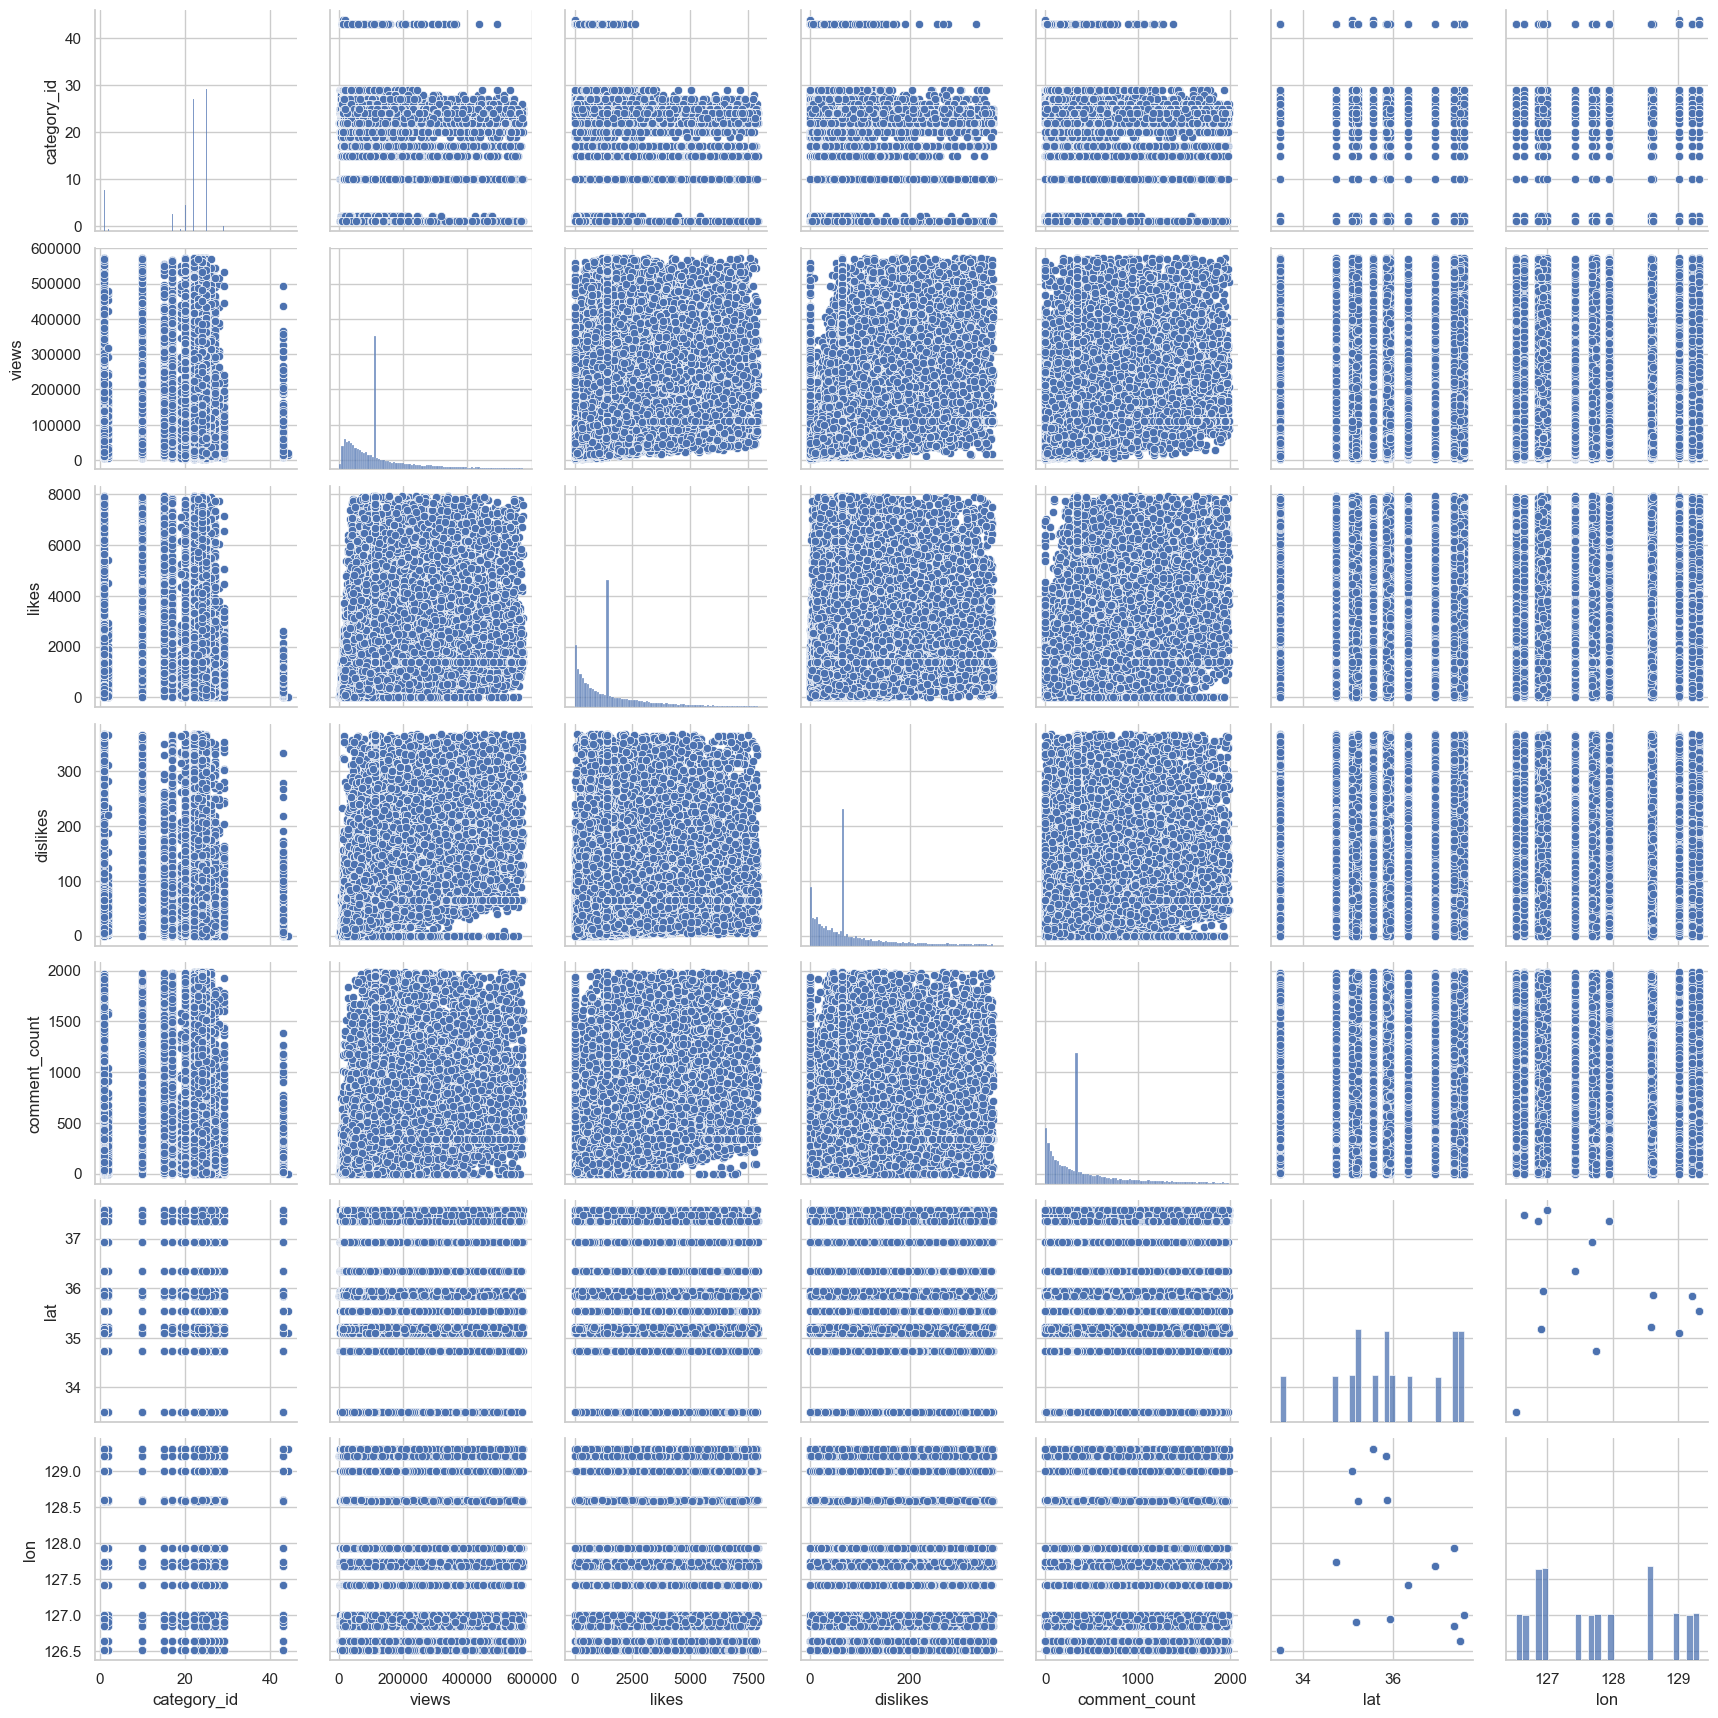

In [43]:
sns.pairplot(df)

In [44]:
output_path = '../data/data_limpia.csv'
df.to_csv(output_path, index=False)